In [ ]:
!pip install control

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction)
from control import (TransferFunction, margin, bode_plot,
                     feedback, pole)

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 14 # tamanho da letraimport matplotlib.pyplot as plt

polos [-0.0440923+0.26242441j -0.0440923-0.26242441j -0.0754954+0.j        ]
margem de ganho 1.6378992607518281
margem de fase 19.525005909422504
freq de w_180 0.3378271453050323
freq de w_c 0.23629749983880796


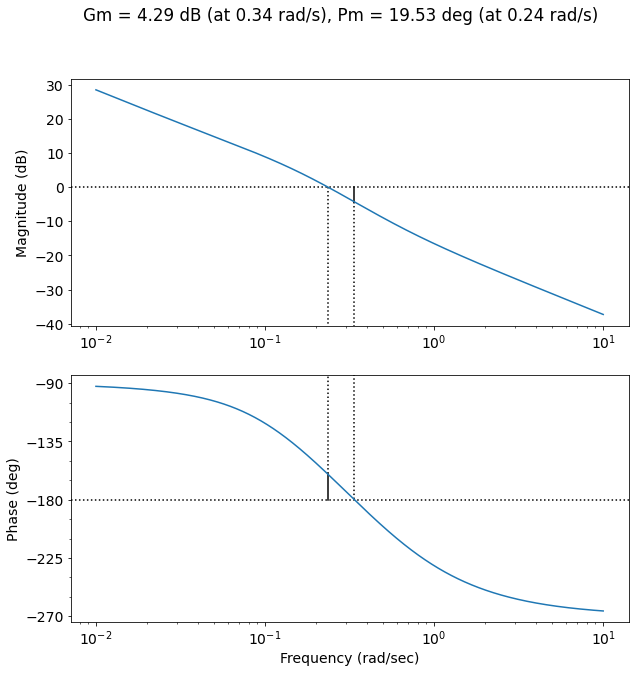

In [4]:
# Análise das margens de estabilidade 
# Sistema Estável

Kp = 1.136

# definição das funções transferência
G = TransferFunction([-6,3], [50,15,1])
K = TransferFunction([12.75*Kp,Kp], [12.75,0])

#malha aberta
L = G*K

# malha fechada
Y_R = feedback(L, 1)

# polos da malha fechada - sistema estável
print('polos',pole(Y_R))

t_ = np.linspace(0, 100, 1001)

# margens de ganho (gm) e fase (pm) e frequencias  
gm, pm, wg, wp = margin(L)

print('margem de ganho', gm) # ctl.mag2db(gm)
print('margem de fase', pm)
print('freq de w_180', wg)
print('freq de w_c', wp)

# Diagram de Bode
plt.figure(1)
plt.title('Bode plot')
mag, phase, omega = bode_plot(L, dB=True, margins=True)

polos [ 0.15984568+0.19639423j  0.15984568-0.19639423j -0.08337135+0.j        ]
margem de ganho inf
margem de fase -60.96352399765699
freq de w_180 nan
freq de w_c 0.23629749983880796


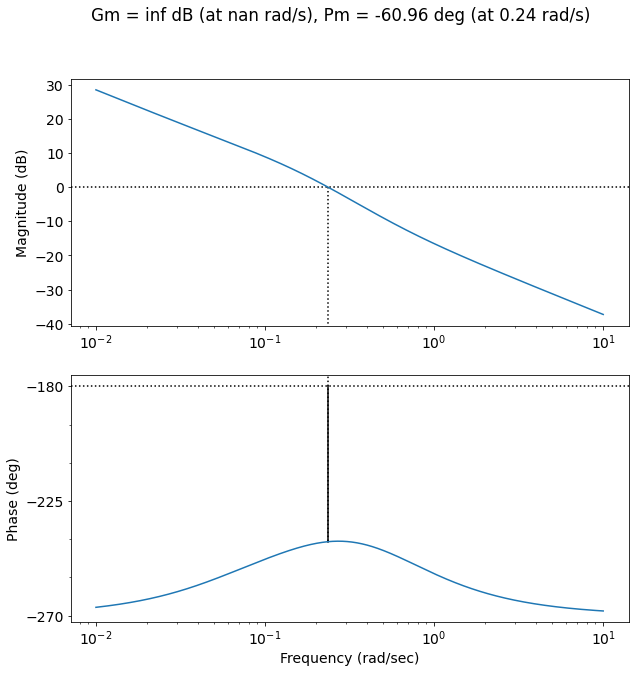

In [9]:
# Análise das margens de estabilidade 
# Sistema Instável

Kp = 1.136

# definição das funções transferência
G = TransferFunction([-6,3], [50,-5,-1]) # alteração dessa FT
K = TransferFunction([12.75*Kp,Kp], [12.75,0])

#malha aberta
L = G*K

# malha fechada
Y_R = feedback(L, 1)

# polos da malha fechada - sistema estável
print('polos',pole(Y_R))

t_ = np.linspace(0, 100, 1001)

# margens de ganho (gm) e fase (pm) e frequencias  
gm, pm, wg, wp = margin(L)

print('margem de ganho', gm) # ctl.mag2db(gm)
print('margem de fase', pm)
print('freq de w_180', wg)
print('freq de w_c', wp)

# Diagram de Bode
plt.figure(1)
plt.title('Bode plot')
mag, phase, omega = bode_plot(L, dB=True, margins=True) #